# Training neural network to predict ball position in a 3d space
## 1. Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from utils.evaluate import evaluate_model
from utils.plot_maker_gaussian_process import plot_maker_3d

## 2. Importing Data

In [2]:
# get all the red ball data
X_butterfly_a = pd.read_csv('../data-6cam-10/butterfly/red_ball_coordinates_128px_2024-03-15_17h19m.csv', decimal='.', delimiter=',')
X_butterfly_b = pd.read_csv('../data-6cam-10/butterfly/red_ball_coordinates_128px_2024-03-15_17h21m.csv', decimal='.', delimiter=',')
X_butterfly_c = pd.read_csv('../data-6cam-10/butterfly/red_ball_coordinates_128px_2024-03-15_17h25m.csv', decimal='.', delimiter=',')
X_hypo_a = pd.read_csv('../data-6cam-10/hypo-cruve/red_ball_coordinates_128px_2024-03-15_17h06m.csv', decimal='.', delimiter=',')
X_hypo_b = pd.read_csv('../data-6cam-10/hypo-cruve/red_ball_coordinates_128px_2024-03-15_17h09m.csv', decimal='.', delimiter=',')
X_hypo_c = pd.read_csv('../data-6cam-10/hypo-cruve/red_ball_coordinates_128px_2024-03-15_17h15m.csv', decimal='.', delimiter=',')
X_lis_a = pd.read_csv('../data-6cam-10/lis-curve/red_ball_coordinates_128px_2024-03-15_17h31m.csv', decimal='.', delimiter=',')
X_lis_b = pd.read_csv('../data-6cam-10/lis-curve/red_ball_coordinates_128px_2024-03-15_17h32m.csv', decimal='.', delimiter=',')
X_lis_c = pd.read_csv('../data-6cam-10/lis-curve/red_ball_coordinates_128px_2024-03-15_17h33m.csv', decimal='.', delimiter=',')
X_spiral_a = pd.read_csv('../data-6cam-10/spiral/red_ball_coordinates_128px_2024-03-15_17h28m.csv', decimal='.', delimiter=',')
X_spiral_b = pd.read_csv('../data-6cam-10/spiral/red_ball_coordinates_128px_2024-03-15_17h29m.csv', decimal='.', delimiter=',')
X_spiral_c = pd.read_csv('../data-6cam-10/spiral/red_ball_coordinates_128px_2024-03-15_17h30m.csv', decimal='.', delimiter=',')


In [3]:
# get all the position data
y_butterfly_a = pd.read_csv('../data-6cam-10/butterfly/positions_xyz_2024-03-15_17h19m.csv', decimal='.', delimiter=',').iloc[1:]
y_butterfly_b = pd.read_csv('../data-6cam-10/butterfly/positions_xyz_2024-03-15_17h21m.csv', decimal='.', delimiter=',').iloc[4:]
y_butterfly_c = pd.read_csv('../data-6cam-10/butterfly/positions_xyz_2024-03-15_17h25m.csv', decimal='.', delimiter=',').iloc[1:]
y_hypo_a = pd.read_csv('../data-6cam-10/hypo-cruve/positions_xyz_2024-03-15_17h06m.csv', decimal='.', delimiter=',').iloc[1:]
y_hypo_b = pd.read_csv('../data-6cam-10/hypo-cruve/positions_xyz_2024-03-15_17h09m.csv', decimal='.', delimiter=',').iloc[4:]
y_hypo_c = pd.read_csv('../data-6cam-10/hypo-cruve/positions_xyz_2024-03-15_17h15m.csv', decimal='.', delimiter=',').iloc[1:]
y_lis_a = pd.read_csv('../data-6cam-10/lis-curve/positions_xyz_2024-03-15_17h31m.csv', decimal='.', delimiter=',').iloc[1:]
y_lis_b = pd.read_csv('../data-6cam-10/lis-curve/positions_xyz_2024-03-15_17h32m.csv', decimal='.', delimiter=',').iloc[1:]
y_lis_c = pd.read_csv('../data-6cam-10/lis-curve/positions_xyz_2024-03-15_17h33m.csv', decimal='.', delimiter=',').iloc[1:]
y_spiral_a = pd.read_csv('../data-6cam-10/spiral/positions_xyz_2024-03-15_17h28m.csv', decimal='.', delimiter=',').iloc[1:]
y_spiral_b = pd.read_csv('../data-6cam-10/spiral/positions_xyz_2024-03-15_17h29m.csv', decimal='.', delimiter=',').iloc[1:]
y_spiral_c = pd.read_csv('../data-6cam-10/spiral/positions_xyz_2024-03-15_17h30m.csv', decimal='.', delimiter=',').iloc[1:]


In [4]:
X_butterfly_a.shape, y_butterfly_a.shape

((1015, 12), (1016, 3))

In [5]:
X_butterfly_b.shape, y_butterfly_b.shape

((1008, 12), (1008, 3))

In [6]:
X_butterfly_c.shape, y_butterfly_c.shape

((1011, 12), (1012, 3))

In [7]:
X_hypo_a.shape, y_hypo_a.shape

((1008, 12), (1009, 3))

In [8]:
X_hypo_b.shape, y_hypo_b.shape

((1020, 12), (1020, 3))

In [9]:
X_hypo_c.shape, y_hypo_c.shape

((1010, 12), (1011, 3))

In [10]:
X_lis_a.shape, y_lis_a.shape

((1015, 12), (1016, 3))

In [11]:
X_lis_b.shape, y_lis_b.shape

((1020, 12), (1021, 3))

In [12]:
X_lis_c.shape, y_lis_c.shape

((1011, 12), (1012, 3))

In [13]:
X_spiral_a.shape, y_spiral_a.shape

((941, 12), (942, 3))

In [14]:
X_spiral_b.shape, y_spiral_b.shape

((917, 12), (918, 3))

In [15]:
X_spiral_c.shape, y_spiral_c.shape

((775, 12), (776, 3))


#### 2.1 Check for Missing Values in all input data

In [16]:
print(f'The amount of NaN values in X_butterfly_a: {X_butterfly_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_b: {X_butterfly_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_butterfly_c: {X_butterfly_c.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_a: {X_hypo_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_b: {X_hypo_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_hypo_c: {X_hypo_c.isna().sum().sum()}')
print(f'The amount of NaN values in X_lis_a: {X_lis_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_lis_b: {X_lis_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_lis_c: {X_lis_c.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiral_a: {X_spiral_a.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiral_b: {X_spiral_b.isna().sum().sum()}')
print(f'The amount of NaN values in X_spiral_c: {X_spiral_c.isna().sum().sum()}')

The amount of NaN values in X_butterfly_a: 350
The amount of NaN values in X_butterfly_b: 0
The amount of NaN values in X_butterfly_c: 2
The amount of NaN values in X_hypo_a: 4
The amount of NaN values in X_hypo_b: 0
The amount of NaN values in X_hypo_c: 0
The amount of NaN values in X_lis_a: 8
The amount of NaN values in X_lis_b: 20
The amount of NaN values in X_lis_c: 12
The amount of NaN values in X_spiral_a: 0
The amount of NaN values in X_spiral_b: 0
The amount of NaN values in X_spiral_c: 0


dataset butterfly_a has a lot of NaN the rest of the NaN can be dropped

In [17]:
X_butterfly_a.isna().sum()

u0      2
v0      2
u1     10
v1     10
u2      0
v2      0
u3      8
v3      8
u4     24
v4     24
u5    131
v5    131
dtype: int64

1. so we will perform interpolation on the dataset, first in notebook: ../ball-prediction/TrajectoryPredictionInterpolation.ipynb and after that we will see if interpolation was successful
2. the interpolation was successful, so we will load the interpolated data
2.1 although the interpolation seems successful, it still could be that the data is not good enough for training the model

In [18]:
X_butterfly_a = pd.read_csv('../data-6cam-10/butterfly/red_ball_coordinates_128px_2024-03-15_17h19m_interpolated.csv', decimal='.', delimiter=',')

### 2.3 Combine all the datasets

In [19]:
X_train = pd.concat([X_butterfly_a, X_butterfly_b, X_butterfly_c, X_hypo_a, X_hypo_b, X_hypo_c, X_lis_a, X_lis_b, X_lis_c, X_spiral_a, X_spiral_b, X_spiral_c])
y_train = pd.concat([y_butterfly_a, y_butterfly_b, y_butterfly_c, y_hypo_a, y_hypo_b, y_hypo_c, y_lis_a, y_lis_b, y_lis_c, y_spiral_a, y_spiral_b, y_spiral_c])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [20]:
X_train.shape, y_train.shape

((11751, 12), (11761, 3))

In [21]:
y_train

,x,y,z
0,3.944211,3.310000,23.57000
1,4.286838,3.138604,23.45574
2,4.799679,3.027806,23.38187
3,5.457039,3.003752,23.36584
4,6.222338,3.085433,23.42029
...,...,...,...
11756,6.662248,0.226000,24.13923
11757,6.591059,0.222000,24.07044
11758,6.529678,0.218000,23.99284
11759,6.479181,0.214000,23.90780


In [22]:
combined = pd.concat([X_train, y_train], axis=1)

## 3. Data Preprocessing

In [23]:
# check for missing values
print(f'The data has missing values: {combined.isnull().sum().sum()}')
combined.dropna(inplace=True)
print(f'The data has missing values: {combined.isnull().sum().sum()}')

The data has missing values: 166
The data has missing values: 0


In [24]:
X = combined.iloc[:, :12]
y = combined.iloc[:, 12:]

In [25]:
# scale the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Hyperparameter Tuning

In [26]:
# create a pipeline
pipeline = Pipeline([
    ('mlp', MLPRegressor(random_state=42))
])

In [27]:
#model = MLPRegressor(solver='adam', max_iter=20000, learning_rate_init=0.001, learning_rate='adaptive', hidden_layer_sizes=(50,100,50), early_stopping=True, alpha=0.01, activation='tanh')

In [28]:
param_grid = {
    'mlp__hidden_layer_sizes': 
        [(50, 100, 50)],
    'mlp__activation': ['identity', 'tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__max_iter': [10000, 20000, 28000],
    'mlp__learning_rate': ['constant', 'adaptive'],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__early_stopping': [True],
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5, n_iter=100, n_jobs=-1, verbose=3, random_state=42)

random_search.fit(X_scaled, y_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xande\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\xande\venv\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\xande\venv\lib\site-

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('mlp',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'mlp__activation': ['identity', 'tanh',
                                                            'relu'],
                                        'mlp__alpha': [0.001, 0.01, 0.1],
                                        'mlp__early_stopping': [True],
                                        'mlp__hidden_layer_sizes': [(50, 100,
                                                                     50)],
                                        'mlp__learning_rate': ['constant',
                                                               'adaptive'],
                                        'mlp__learning_rate_init': [0.001, 0.01,
                                                                    0.1],
                                        'mlp__max_iter': [10000, 20000, 28000],
                                        'mlp__solver': ['sgd', 'adam']},
                   random_state=42, verbose=3)

In [29]:
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Best parameters: {'mlp__solver': 'adam', 'mlp__max_iter': 10000, 'mlp__learning_rate_init': 0.001, 'mlp__learning_rate': 'constant', 'mlp__hidden_layer_sizes': (50, 100, 50), 'mlp__early_stopping': True, 'mlp__alpha': 0.001, 'mlp__activation': 'tanh'}
Best score: 0.6380559920062226


In [30]:
model = random_search.best_estimator_

## 5. Training the Model

In [31]:
model.fit(X_scaled, y_scaled)

Pipeline(steps=[('mlp',
                 MLPRegressor(activation='tanh', alpha=0.001,
                              early_stopping=True,
                              hidden_layer_sizes=(50, 100, 50), max_iter=10000,
                              random_state=42))])

## 6. Make Predictions On Test Data

In [32]:
import pandas as pd

In [34]:
X_test_spiral = pd.read_csv('../data-6cam-10/test-8/red_ball_coordinates_128px_2024-03-15_17h37m.csv', decimal='.', delimiter=',')
y_test_spiral = pd.read_csv('../data-6cam-10/test-8/positions_xyz_2024-03-15_17h37m.csv', decimal='.', delimiter=',').iloc[1:]
X_test_spiral.shape, y_test_spiral.shape

((515, 12), (515, 3))

In [35]:
X_test_8 = pd.read_csv('../data-6cam-10/test-circle/red_ball_coordinates_128px_2024-03-15_17h36m.csv', decimal='.', delimiter=',')
y_test_8 = pd.read_csv('../data-6cam-10/test-circle/positions_xyz_2024-03-15_17h36m.csv', decimal='.', delimiter=',').iloc[1:]
X_test_8.shape, y_test_8.shape

((533, 12), (533, 3))

In [36]:
def prepare_and_scale_test_data(X_test_val, y_test_val, scaler_x_test):
    y_test_val = y_test_val.iloc[4:]
    combined_test = pd.concat([X_test_val, y_test_val], axis=1)
    combined_test.dropna(inplace=True)
    X_val = combined_test.iloc[:, :12]
    y_val = combined_test.iloc[:, 12:]
    X_scaled_test = scaler_x_test.transform(X_val)
    return X_scaled_test, y_val

In [37]:
def predict_evaluate_plot(X_test_val_scaled, y_test_val, nn_model, scaler_y_test, title='Trajectory of Ball in 3D Space'):
    y_test_predicted_scaled = nn_model.predict(X_test_val_scaled)
    y_test_pred = scaler_y_test.inverse_transform(y_test_predicted_scaled)
    mse, mae, r2 = evaluate_model(y_test_val, y_test_pred, 'Test Data')
    # change col 1 and 2 from place, so it corresponds to the unity 3d space
    y_test_pred = y_test_pred[:, [0, 2, 1]]
    y_test_val = y_test_val.to_numpy()[:, [0, 2, 1]]
    plot_maker_3d(y_test_val, y_test_pred, title)
    return y_test_pred, mse, mae, r2

In [38]:
X_test_spiral_scaled, y_test_spiral = prepare_and_scale_test_data(X_test_spiral, y_test_spiral, scaler_x)

Mean Squared Error on Test Data Set: 0.3809712790422101
Mean Absolute Error on Test Data Set: 0.3259727276894679
R2 Score on Test Data set: 0.6318753865503787


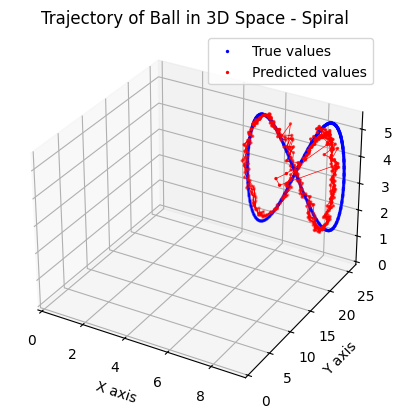

In [39]:
X_test_spiral_pred, mse_spiral, mae_spiral, r2_spiral = predict_evaluate_plot(X_test_spiral_scaled, y_test_spiral, model, scaler_y, title='Trajectory of Ball in 3D Space - Spiral')

Mean Squared Error on Test Data Set: 0.8169164463866266
Mean Absolute Error on Test Data Set: 0.6366536223721372
R2 Score on Test Data set: 0.8423465572117962


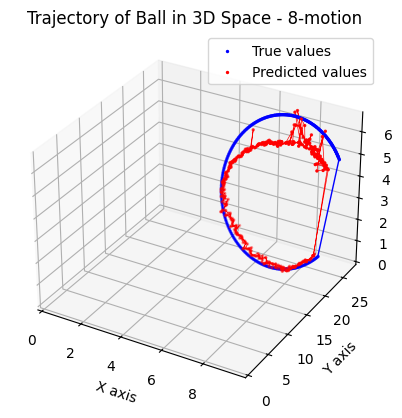

In [40]:
X_test_8_scaled, y_test_8 = prepare_and_scale_test_data(X_test_8, y_test_8, scaler_x)
X_test_8_pred, mse_8, mae_8, r2_8 = predict_evaluate_plot(X_test_8_scaled, y_test_8, model, scaler_y, title='Trajectory of Ball in 3D Space - 8-motion')